# Tarea 2

In [2]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Ejercicio 1

In [77]:
# Se utiliza el algoritmo por biparticion vito en clase
def raiz_bip(func, x_i, x_d, args, n_max, err = 1e-5):
    raiz = 0.5*(x_i+x_d)
    y_i, y_d = func(x_i, args), func(x_d, args)
    n = 0
    while abs(y_i-y_d)>=err and n<n_max:
        n = n+1
        y_m = func(raiz, args)
        if y_m == 0:
            break
        if y_m*y_i < 0:
            x_d = raiz
        else:
            x_i = raiz
        raiz = 0.5*(x_i+x_d)
        y_i,y_d = func(x_i, args),func(x_d, args)
        
    if n == n_max-1:
        return False, 0
    elif abs(func(raiz, args))<err:
        return True, raiz
    else:
        return False, 0

def busca_raices(func, xi, xd, args, n, N):
    # Se parte el intervalo en muchos pedazos
    x = linspace(xi, xd, N)
    # Se crea un arreglo donde se iran guardando las raices
    RAICES = []
    # Se determina el error segun la particion de x que se elija
    err = min(1.0e-4, (xd-xi)/N)
    # Se realiza una busqueda de raices entre x[i] y x[i+1]
    for i in range(len(x)-1):
        # Se busca la raiz
        encont_raiz, raiz = raiz_bip(func, x[i], x[i+1], args, n, err)
        
        # Si encontro una raiz la guarda y mas en el intervalo
        if encont_raiz:
            # guarda la raiz
            RAICES.append(raiz)

            encont_raiz_inf, raices_inf = busca_raices(func, x[i], raiz-err, args, n, N)
            encont_raiz_sup, raices_sup = busca_raices(func, raiz+err, x[i+1], args, n, N)
            
            if encont_raiz_inf:
                RAICES = RAICES + raices_inf
            if encont_raiz_sup:
                RAICES = RAICES + raices_sup    

    if len(RAICES)>0:
        return True, RAICES
    else:
        return False, RAICES
    
def busca_todas_las_raices(func, xi, xd, args, n=50, N=10):
    m = 5
    lens = zeros(m)
    raices = []
    for i in range(1,m+1):
        val, raices_i = busca_raices(func, xi, xd, args, n, N+i-1)
        lens[i-1] = len(raices_i)
        raices.append(raices_i)
    max_len = amax(lens)
    
    if max_len==0:
        return 0
    for i in range(m):
        if lens[i] == max_len:
            return raices[i]

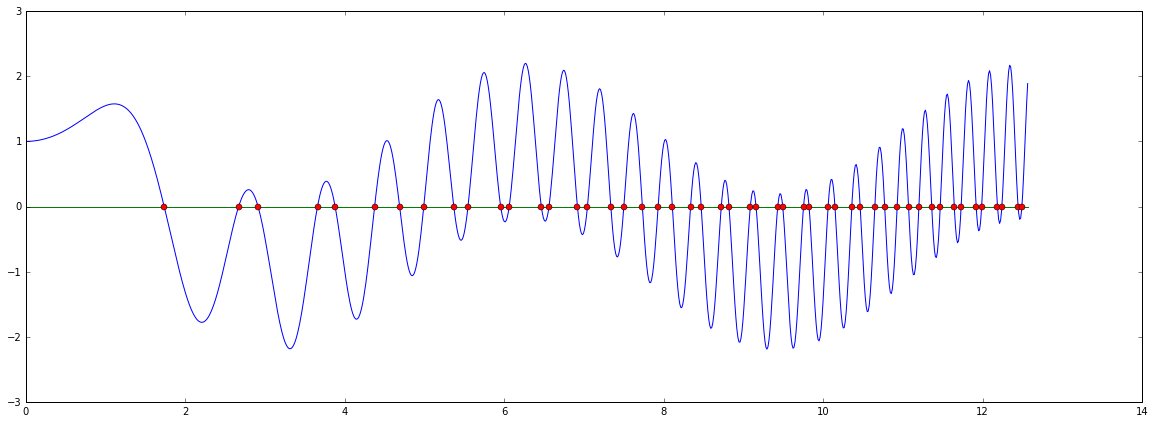

In [85]:
def func_prueba(x, args):
    return cos(args*x)+1.2*sin(x*x)
    
fig = figure(figsize=(20,7))
ax = fig.add_subplot(111)

N = 3
xi = 0
xd = 4*pi

x = linspace(xi, xd, 1000)
y = func_prueba(x,1)
plot(x, y, x, zeros_like(x))

raices = busca_todas_las_raices(func_prueba, xi, xd, 1, 100, N)
if raices==0:
    print "no hay raices"
else:
    plot(raices, zeros_like(raices), 'o')

## Ejercicio 2

$$f(x,y) = 2 e^{-(x+1)^2}\left(e^{-(y+2)^2}+e^{-(y-2)^2}\right) + 6x(x^2+y^2)e^{-(x^2+y^2)}-1$$

In [40]:
def func_2(y, x):
    return 2*exp(-(x+1)**2)*(exp(-(y+2)**2)+exp(-(y-2)**2)) + 6*x*(x**2+y**2)*exp(-(x**2+y**2))-1

In [58]:
def busca_raiz_2D(func, x_int, y_int, Res, N):
    x = arange(x_int[0], x_int[1]+Res, Res)
    raices_x = []
    raices_y = []
    for xi in x:
        raices_temp = busca_todas_las_raices(func, y_int[0], y_int[1], xi, 50, N)
        if raices_temp!=0:
            for yi in raices_temp:
                raices_x.append(xi)
                raices_y.append(yi)
    return raices_x, raices_y

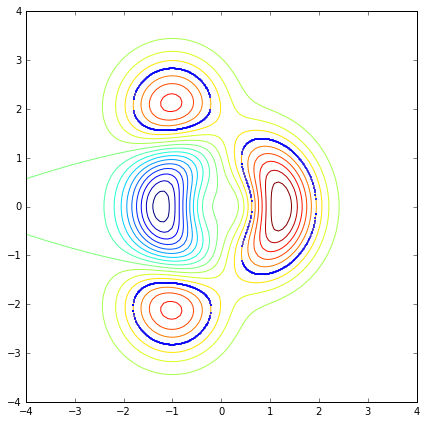

In [94]:
fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)

x = linspace(-4,4,100)
y = linspace(-4,4,100)
X, Y = meshgrid(x, y)

f = func_2(Y, X)
ax.contour(X, Y, f, 20)

raices = busca_raiz_2D(func_2, [-4,4], [-4,4], 0.01, 3)
ax.plot(raices[0], raices[1], '.', markersize=2)

## Ejercicio 3